All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 200:
> We will now perform cross-validation on a simulated data set.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression


%matplotlib inline
sns.set()

# (a)

From the textbook, p. 200:
> Generate a simulated data set as follows:
```
set.seed(1)
x = rnorm(100)
y = x - 2*x^2 + rnorm(100)
```
In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.

In [2]:
np.random.seed(1)
x = np.random.normal(size=100)
y = x - 2*x**2 + np.random.normal(size=100)

# (b)

From the textbook, p. 200:
> Create a scatterplot of $X$ against $Y$. Comment on what you find.

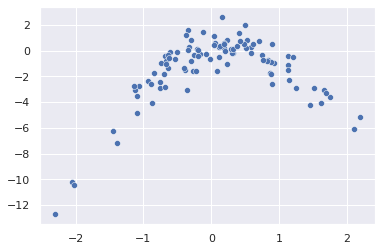

In [3]:
sns.scatterplot(x=x, y=y)

I see a parabolic relationship. The points are clustered around zero.

# (c)

From the textbook, p. 200:
> Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
  1. $Y = \beta_0 + \beta_1 X + \epsilon$.
  2. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$.
  3. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$.
  4. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$.
<br>Note you may find it helpful to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.

In [4]:
predictors = pd.DataFrame({'x' : x
                          , 'x2' : x**2
                          , 'x3' : x**3
                          , 'x4' : x**4
                          , 'intercept' : 1
                          }
                          )
def loocv(seed):
  active = ['intercept']
  for each in ['x', 'x2', 'x3', 'x4']:
    active.append(each)
    errors = []
    for i, row in predictors[active].iterrows():
      model = LinearRegression()
      model.fit(predictors[active].drop(i), np.delete(y, i))
      pred = model.predict(row.to_numpy().reshape(1, -1))
      errors.append((y[i] - pred)**2)
    print(f'Polynomial with {each} as top component has LOOCV error of {np.mean(errors)}.')

loocv(seed=1)

Polynomial with x as top component has LOOCV error of 6.260764331604616.
Polynomial with x2 as top component has LOOCV error of 0.9142897072803657.
Polynomial with x3 as top component has LOOCV error of 0.9268768781648798.
Polynomial with x4 as top component has LOOCV error of 0.8669116865881087.


# (d)

From the textbook, p. 201:
> Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [5]:
loocv(seed=5)

Polynomial with x as top component has LOOCV error of 6.260764331604616.
Polynomial with x2 as top component has LOOCV error of 0.9142897072803657.
Polynomial with x3 as top component has LOOCV error of 0.9268768781648798.
Polynomial with x4 as top component has LOOCV error of 0.8669116865881087.


They are the same because the LOOCV procedure is deterministic.

# (e)

From the textbook, p. 201:
> Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$ has the smallest LOOCV error; this is probably because of overfitting.